# Seaborn

In [53]:
import pandas as pd 
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
conn = sqlite3.connect("../../data/checking-logs.sqlite")

In [55]:
q = '''
    SELECT uid, timestamp, numTrials
    FROM checker
    WHERE labname = 'project1' AND uid LIKE 'user_%' AND status = 'ready'
'''
df = pd.io.sql.read_sql(q, conn, parse_dates=['timestamp'])

In [56]:
commit_dynamic = df.pivot(index='timestamp', columns='uid', values='numTrials')

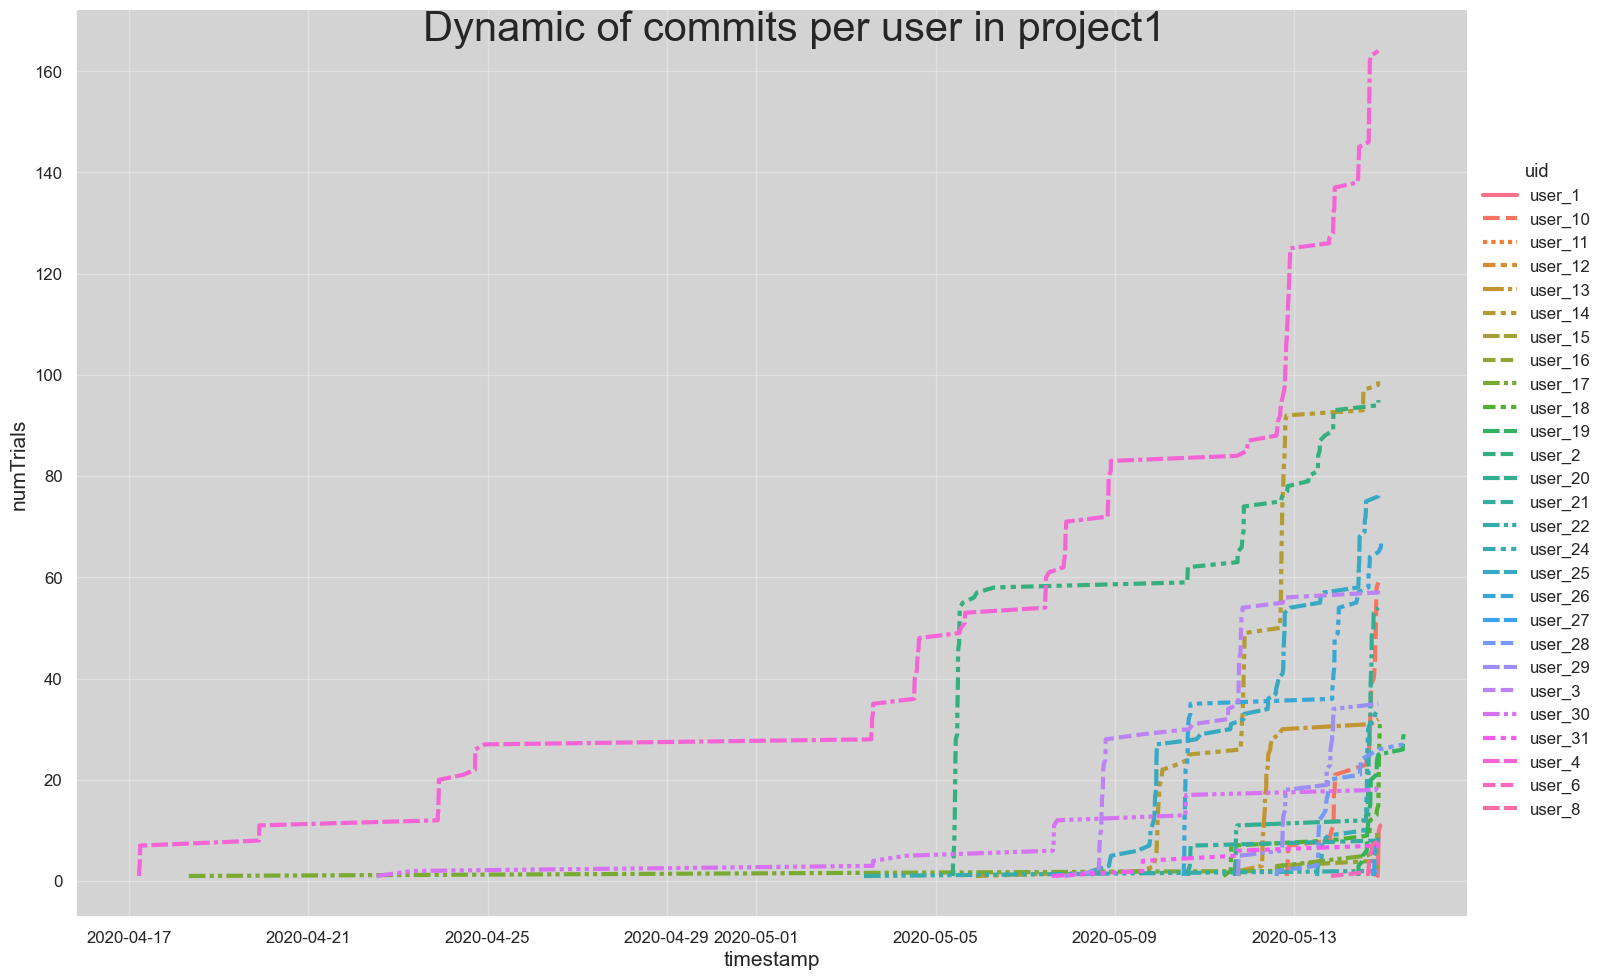

In [58]:
sns.set_theme(
    palette="pastel",
    font="Arial",
    font_scale=1.1,
    rc={
        'axes.titlesize': 15,
        'axes.labelsize': 15,
        'lines.linewidth': 3,
        'axes.facecolor':'lightgray'
    }
)
plot = sns.relplot(data=commit_dynamic,
            kind="line",
            height=10,
            aspect=1.5,)
plt.suptitle("Dynamic of commits per user in project1", fontsize = 30)
plot.set_ylabels("numTrials");


“Which user was the leader in the number of commits almost all of the time?” The answer: user_4.
<br>
“Which user was the leader for only a short period of time?” The answer: user_2.

In [59]:
conn.close()